<a href="https://colab.research.google.com/github/mueller14003/PH150/blob/main/Lab02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Physics 150 
# Lab #2 - Simple Pendulum - Plotting

**Group 4:**
* Kyle Mueller
* Sam Fataua
* Makenzy Pharis

The simple pendulum consists of a mass attached to a string. The length, L, is measured from the pivot to the center of mass. The period, T, is defined as the time to make one complete oscillation. For small angles (less than ~10°), the length and period are related by the equation:

(1)
$$T = 2\pi{}\sqrt{\frac{L}{g}}$$

Squaring both sides of eqn. (1) gives:

(2)
$$T^2 = \frac{4\pi{}^2}{g}L$$

## **Activity I** - Single Data Point (25 pts.)

Use the example on pp.68-69 of the text as a guide. Using just one data point for length and period, determine a value for g with its uncertainty. Explain how you came up with your values for $\delta{}$l and $\delta{}$T. Your goal is to maximize the accuracy for g and minimize its uncertainty. Show your work below.

$g = \frac{4\pi{}^2}{T^2}L$

### Calculations

In [ ]:
from math import pi, sqrt

In [ ]:
L = 0.94
dL = 0.002
T = 1.94
dT = 0.1

In [ ]:
g = L*(4*pi**2)/(T**2)
dg = g * sqrt(((dL/L)**2) + ((2*(dT/T))**2))

### Values

In [ ]:
print(f"Estimated gravity: {g:0.2f} m/s²")

Estimated gravity: 9.86 m/s²


In [ ]:
print(f"Uncertainty of estimated gravity: {dg:0.0f} m/s²")

Uncertainty of estimated gravity: 1 m/s²


### Response

How we came up with $\delta{}L$:

To find the uncertainty of L, we concluded that the center of mass of the weight attatched to the pendulum was within a certain range of values. The possible values for the measurement ranged between approximately 0.938m and 0.942m, so we determined that the uncertainty of L was 0.002m.

How we came up with $\delta{}T$:

To find the uncertainty of T, we timed the period of the pendulum a few times. We found that the recorded values of T ranged from around 1.85s to around 2.05s. From this data, we can conclude that the approximate uncertainty of T is 0.1s.

## **Activity II** - Plot by Hand (25 pts.)

**(Note: Each member of the group should produce a separate graph for this Activity.)

Vary the length of the string from 0.25 m to 2 meters. For five different lengths, measure the period for one oscillation using a photogate. Make a plot of T² vs. L by hand. Fit a straight line to the data and determine the slope of the line (on your graph, show the "rise" and "run" that are used to calculate the slope). 

| Length (m) | Time (s) |
|------------|----------|
| 0.24       | 0.9742   |
| 0.50       | 1.4170   |
| 0.98       | 1.9791   |
| 1.46       | 2.4119   |
| 1.97       | 2.8126   |



Write the equation of the straight line:

$T^2=4L$

By setting the slope of the line equal to $\frac{4\pi{}^2}{g}$, a value for g (the acceleration of gravity) can be determined. Compare your value of g to the accepted value of 9.80 m/s².

Measured value of g: 9.86 m/s²

% Error:

Hint: % Error = $\frac{|accepted - measired|}{accepted} \times 100$%

In [ ]:
accepted = 9.80
measured = 9.86
p_err = (abs(accepted-measured)/accepted)*100

In [ ]:
print(f"Percent Error: {p_err:0.2f}%")

Percent Error: 0.61%


A simple pendulum of unknown length will be set up in the front of the classroom by the instructor. Measure the period of oscillation and use your hand drawn graph to estimate the length. Show the data point on your graph using a red pencil or pen.

Estimated Length:

In [ ]:
estimate_length = lambda time: (time**2)/4

In [ ]:
print(f"Estimated Length: {estimate_length(2.22):0.2f}m")

Estimated Length: 1.23m


## **Activity III** - Plot using Jupyter Notebook (25 pts.)

Using the data from Activity 2, make a plot of T² vs. L using Python. Fit a straight line to the data points. The Python code to plot the data and fit a straight line is given below. From the slope of the fit, determine a value of g with its uncertainty. Include the correct units. Include your graph in your submission.

Measured value of g: 9.84 m/s²

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from math import pi

In [ ]:
l = [0.24, 0.50, 0.98, 1.46, 1.97]
time = [0.9742, 1.4170, 1.9791, 2.4119, 2.8126]
t = np.array(time,float)

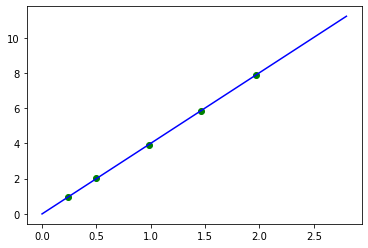

In [ ]:
plt.plot(l,t**2,"go")
slope, intercept, r_value, p_value, std_err = stats.linregress(l,t**2)
x = np.linspace(0,2.8,10)
y = slope * x + intercept
plt.plot(x,y,'b')
plt.show()

In [ ]:
g = 4*pi**2/slope
un_g = g*std_err/slope

In [ ]:
print(f"Estimated Gravity: {g:0.2f} m/s²")

Estimated Gravity: 9.84 m/s²


In [ ]:
print(f"Uncertainty of estimated Gravity: {un_g:0.2f} m/s²")

Uncertainty of estimated Gravity: 0.04 m/s²


## **Activity IV** - Simple Pendulum with Damping (25 pts.)

Using a ping pong ball attached to the end of a 1.50 m length string, measure the amplitude of the oscillation as a function of time. To measure the angle, you can take a video of the motion. Make sure you have some kind of scale visible when you take the video. The amplitude should decay exponentially according to:

$$\theta{}(t) = \theta{}_o{}e^{-bt/m}$$

where $\theta{}_o{}$ is the initial angle, $m$ is the mass of the ping pong ball, and $b$ is the damping constant. 
Make a plot of your data as well as equation 3. You will need to adjust the value of b until you get a good fit. Report your value of the damping constant with the proper units. Include your graph with your submission.


b = 0.00035 g/s

To plot equation 3, you can use the following code:

In [ ]:
t_p = [0,3,5,10,18,23]
theta = [20,10,5,4.5,2.5,1.5]

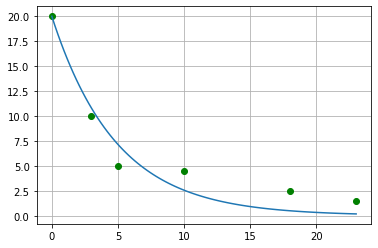

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

b = 0.00035                 # damping coefficient
m = 0.0017                  # mass of ping pong ball in kg

plt.plot(t_p,theta,"go")

θo = 20
t = np.linspace(0,23,100)   # tmax will be your time range
θ = θo*np.exp(-b*t/m)       # enter value for θo
plt.plot(t,θ)
plt.grid()
plt.show()